In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


# **Load basic libraries**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# **Load the datasets**

In [4]:
train_dataset = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv")
test_dataset = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv")
sample_dataset = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv")

# **Data samples and statistics**

In [5]:
train_dataset.duplicated().sum(), test_dataset.duplicated().sum()

(0, 0)

In [6]:
train_dataset.shape, test_dataset.shape, sample_dataset.shape

((13636, 15), (4546, 14), (1000, 2))

In [7]:
train_dataset.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [8]:
test_dataset.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,86,45,41384,Black Bean ‘n’ Pumpkin Chili,sp_aUSaElGf_41384_c_341929,u_1oKc4U6bh65cEli8Z8eTIf98Vpr,kalloween,1,1622718043,0,0,0,100,This was so good!! The pumpkin was perfect as...
1,102,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_274545,u_1oKW5seFLQMSwAeOfBVmwJizy5D,chocolate desert,1,1622717685,0,0,1,100,"So good! Could not stop eating them, so bad...."
2,156,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_398512,u_1oKZ6GUIAIol8xe6oEI7t1Mpxdz,Vantreesta,1,1622718307,0,0,0,100,I use a small ladle to fill muffin cups.
3,18,89,1324,Porcupine Meatballs,sp_aUSaElGf_1324_c_431662,u_1oKWCP33NVk4Osfpu4VJuIckEF0,Roberta L.Beauchamp,1,1622648872,0,4,3,212,I made this and followed the instructions as d...
4,27,70,32264,Easy Chicken Enchiladas,sp_aUSaElGf_32264_c_423935,u_1oKVhIJMuUlrSCVkbO1jheVTol8,fhquilting,1,1622718460,0,0,1,100,Very Good! I used corn tortillas. Used fresh...


In [9]:
sample_dataset.head()

,ID,Rating
0,1,5
1,2,2
2,3,4
3,4,2
4,5,4


In [10]:
train_dataset.describe()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
count,13636.000000,13636.000000,13636.000000,13636.000000,1.363600e+04,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,121.085289,38.624377,21785.990833,2.160311,1.623713e+09,0.014520,1.098269,0.543708,4.288721,153.127897
std,116.995633,29.672351,23883.189918,10.086424,5.444020e+06,0.137323,4.166487,3.265660,1.544839,140.986908
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6504.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,148.000000,63.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,510.000000,1.665756e+09,3.000000,80.000000,126.000000,5.000000,946.000000


In [11]:
test_dataset.describe()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore
count,4546.000000,4546.000000,4546.000000,4546.000000,4.546000e+03,4546.000000,4546.000000,4546.000000,4546.000000
mean,122.605147,38.884294,21736.701936,2.157501,1.623702e+09,0.014958,1.062253,0.566212,153.264848
std,116.006955,30.129333,24211.777711,9.797366,5.542652e+06,0.139922,4.303231,4.021903,141.355650
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,12.000000
25%,46.000000,11.000000,6086.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,100.000000
50%,92.000000,32.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,100.000000
75%,154.000000,64.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,100.000000
max,715.000000,100.000000,191775.000000,520.000000,1.665669e+09,3.000000,106.000000,122.000000,931.000000


**Correlation graph between 'RecipeNumber' and 'ThumbsUpCount'**
* Here is a scatter plot between 'RecipeNumber' and 'ThumbsUpCount', with 'RecipeNumber' on the x-axis and 'ThumbsUpCount' on the y-axis. The scatter plot will also include histograms of the individual distributions along the axes.

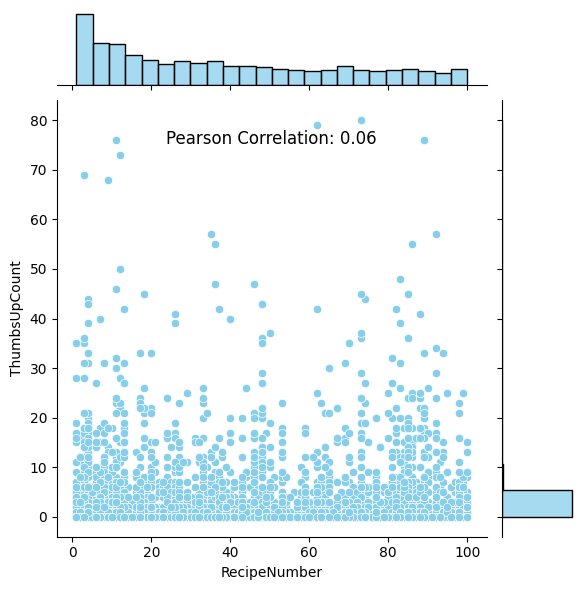

In [12]:
import seaborn as sns
from scipy.stats import pearsonr

# Create a jointplot
sns.jointplot(x='RecipeNumber', y='ThumbsUpCount', data=train_dataset, kind='scatter', color='skyblue')

# Calculate the Pearson correlation coefficient
corr_coefficient, _ = pearsonr(train_dataset['RecipeNumber'], train_dataset['ThumbsUpCount'])

# Annotate the plot with the Pearson correlation coefficient
plt.annotate(f'Pearson Correlation: {corr_coefficient:.2f}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=12)

# Show the plot
plt.show()


**Correlation graph between 'RecipeNumber' and 'ThumbsDownCount'**
* Here is a scatter plot between 'RecipeNumber' and 'ThumbsDownCount', with 'RecipeNumber' on the x-axis and 'ThumbsDownCount' on the y-axis. The scatter plot will also include histograms of the individual distributions along the axes.

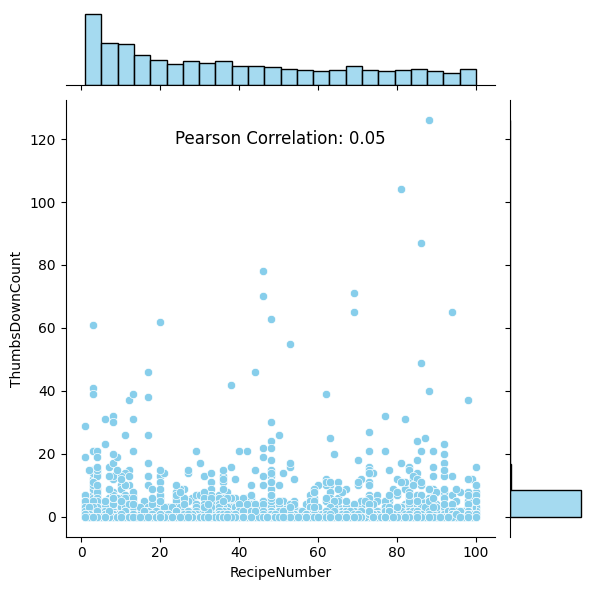

In [13]:
import seaborn as sns
from scipy.stats import pearsonr

# Create a jointplot
sns.jointplot(x='RecipeNumber', y='ThumbsDownCount', data=train_dataset, kind='scatter', color='skyblue')

# Calculate the Pearson correlation coefficient
corr_coefficient, _ = pearsonr(train_dataset['RecipeNumber'], train_dataset['ThumbsDownCount'])

# Annotate the plot with the Pearson correlation coefficient
plt.annotate(f'Pearson Correlation: {corr_coefficient:.2f}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=12)

# Show the plot
plt.show()


In [14]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


In [15]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 4546 non-null   int64 
 1   RecipeNumber       4546 non-null   int64 
 2   RecipeCode         4546 non-null   int64 
 3   RecipeName         4546 non-null   object
 4   CommentID          4546 non-null   object
 5   UserID             4546 non-null   object
 6   UserName           4546 non-null   object
 7   UserReputation     4546 non-null   int64 
 8   CreationTimestamp  4546 non-null   int64 
 9   ReplyCount         4546 non-null   int64 
 10  ThumbsUpCount      4546 non-null   int64 
 11  ThumbsDownCount    4546 non-null   int64 
 12  BestScore          4546 non-null   int64 
 13  Recipe_Review      4546 non-null   object
dtypes: int64(9), object(5)
memory usage: 497.3+ KB


# **Feature engineering/extraction**

In [16]:
train_dataset.isna().any()

ID                   False
RecipeNumber         False
RecipeCode           False
RecipeName           False
CommentID            False
UserID               False
UserName             False
UserReputation       False
CreationTimestamp    False
ReplyCount           False
ThumbsUpCount        False
ThumbsDownCount      False
Rating               False
BestScore            False
Recipe_Review         True
dtype: bool

In [17]:
train_dataset.isna().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

Here we assume that there is a direct mapping between Rating and Recipe_Review, and therefore we fill the empty Recipe_Review fields with the Review sentiments mapped to ratings in the rating_mapping dictionary.

In [18]:
def fill_null_reviews(train_dataset):

  rating_mapping = {5: 'GREAT',4:'GOOD',2:'BORING',0:'VERY BAD', 1: 'BAD', 3: 'OK'}
  train_dataset.loc[train_dataset['Recipe_Review'].isna(), 'Recipe_Review'] = train_dataset['Rating'].map(rating_mapping)
  return train_dataset

fill_null_reviews(train_dataset)

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13631,115,98,11767,Quick Cream of Mushroom Soup,sp_aUSaElGf_11767_c_127710,u_1oKVbHjirkAIWwTjbt9dWyqENo2,elbay,1,1622716969,0,0,0,5,100,Delicious!! Very easy to make! One minor chang...
13632,372,6,21444,Favorite Chicken Potpie,sp_aUSaElGf_21444_c_196030,u_1oKXoBnyJ2ocquNYwAhs19LMSrA,PauletteInhofe,1,1622717329,0,0,0,5,100,I made this pie for my family and they loved i...
13633,87,37,20170,Taco Lasagna,sp_aUSaElGf_20170_c_359338,u_1oKbGr5o9tj0mQl1rkVqzWnE481,Barbaralarkin,1,1622718089,0,0,0,5,100,Very tasty!
13634,48,63,24886,Chicken and Dumplings,sp_aUSaElGf_24886_c_175514,u_1oKWD7Dqjmc0oYHdW8Vm3fzhxJW,SammyPrissy,1,1622717192,0,0,0,5,100,I have made this numerous times. It&#39;s so ...


In [19]:
train_dataset.isna().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        0
dtype: int64

In [20]:
test_dataset.isna().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
BestScore            0
Recipe_Review        0
dtype: int64

In [21]:
train_dataset.isin(['?']).sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        0
dtype: int64

In [22]:
test_dataset.isin(['?']).sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
BestScore            0
Recipe_Review        0
dtype: int64

In [23]:
train_dataset['UserReputation'].value_counts()

UserReputation
1      12708
10       478
20       217
0        118
30        54
50        16
40        12
90         7
80         4
60         4
110        3
510        3
100        3
140        2
70         2
220        1
160        1
130        1
150        1
300        1
Name: count, dtype: int64

From the box plot we can see that most of the users have a UserReputation around 0-100.

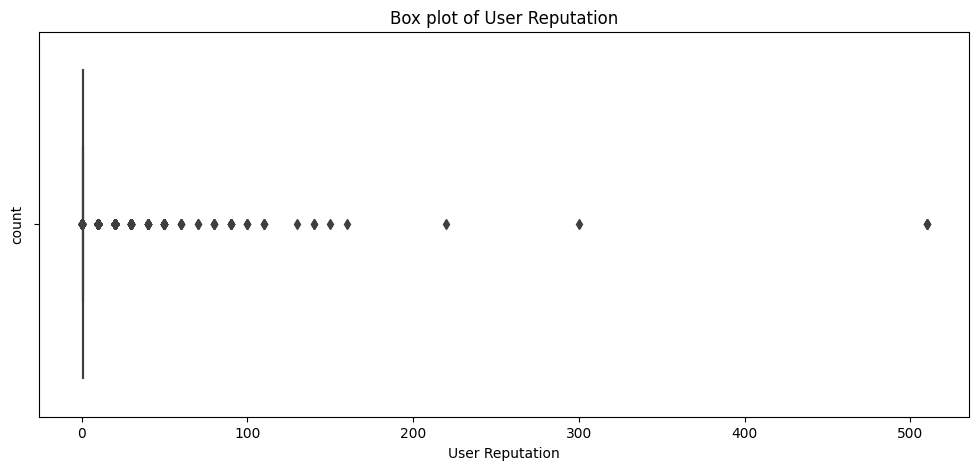

In [24]:
plt.figure(figsize=(12,5))
sns.boxplot(x='UserReputation', data=train_dataset)
plt.xlabel('User Reputation')
plt.ylabel('count')
plt.title('Box plot of User Reputation')
plt.show()

In [25]:
train_dataset['Rating'].value_counts()

Rating
5    10371
0     1272
4     1241
3      368
1      210
2      174
Name: count, dtype: int64

From the bar graph we can see that most recipes (10371 recipes) have received a Rating of 5, followed by 0 and then 4.

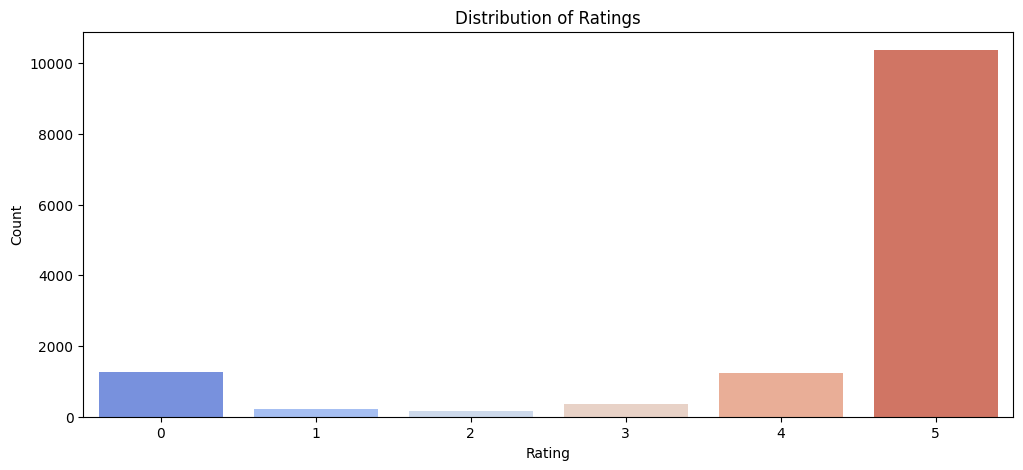

In [26]:
plt.figure(figsize=(12, 5))
sns.countplot(x='Rating', data=train_dataset, palette='coolwarm')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

In [27]:
train_dataset['BestScore'].value_counts()

BestScore
100    10506
193     1074
253      292
142      147
297      124
       ...  
908        1
529        1
119        1
226        1
754        1
Name: count, Length: 525, dtype: int64

From the histogram we can see that most recipes (10506 recipes) have received the BestScore of 100, followed by a BestScore of 193. 

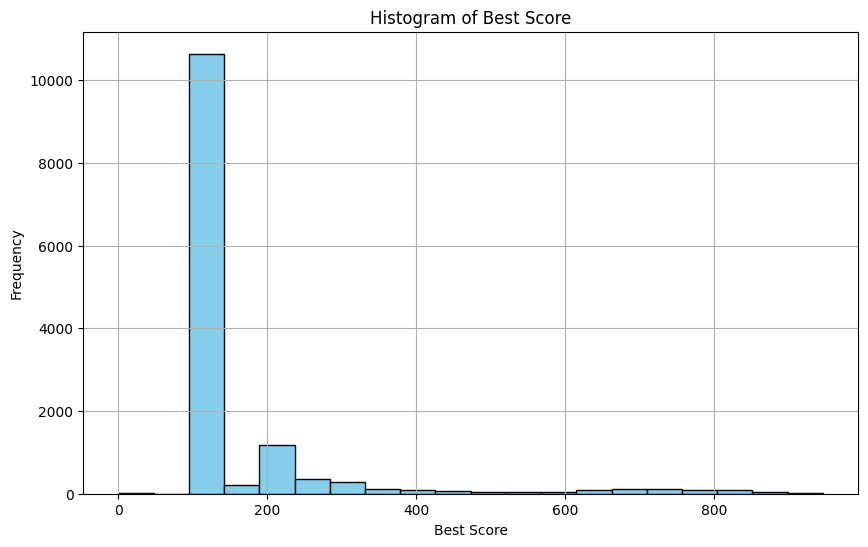

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(train_dataset['BestScore'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Best Score')
plt.ylabel('Frequency')
plt.title('Histogram of Best Score')
plt.grid(True)
plt.show()

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

Calculating the correlation matrix between the selected columns of the DataFrame train_dataset and then visualizing the correlations using a heatmap. 

The highest correlation is between BestScore and ThumbsUpCount with a correlation coefficient of 0.69.

Whereas the lowest correlation is between ID and RecipeNumber with a correlation coefficient of -0.49.

<Axes: >

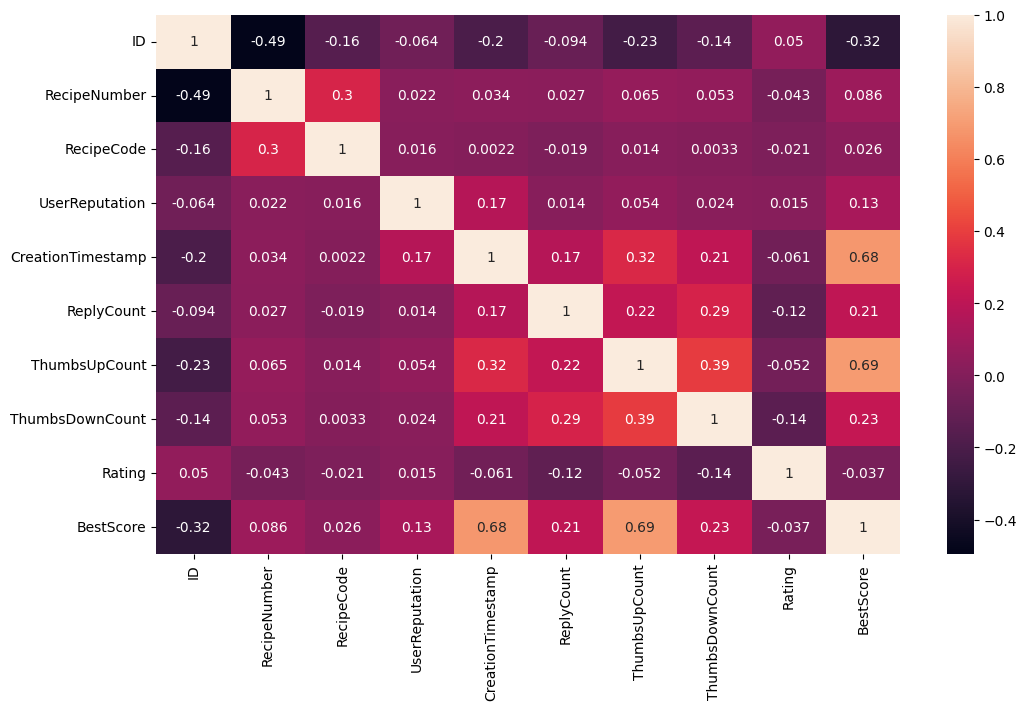

In [30]:
correlation = train_dataset[['ID', 'RecipeNumber','RecipeCode', 'UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore']].corr()
plt.figure(figsize=(12,7))
sns.heatmap(correlation,annot=True)

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [32]:
cat_features = train_dataset.select_dtypes(['object']).columns
num_features = train_dataset.select_dtypes(['int','float']).columns

In [33]:
cat_features

Index(['RecipeName', 'CommentID', 'UserID', 'UserName', 'Recipe_Review'], dtype='object')

In [34]:
num_features

Index(['ID', 'RecipeNumber', 'RecipeCode', 'UserReputation',
       'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount',
       'Rating', 'BestScore'],
      dtype='object')

**Plotting all numerical attributes with histogram plot for quick examination.**
* Features are at different scales.
* Features have different distributions -
 * A few are tail heavy. e.g. ID, BestScore
 * A few have a single mode. e.g. UserReputation, CreationTimestamp, ReplyCount, ThumbsUpCount, ThumbsDownCount

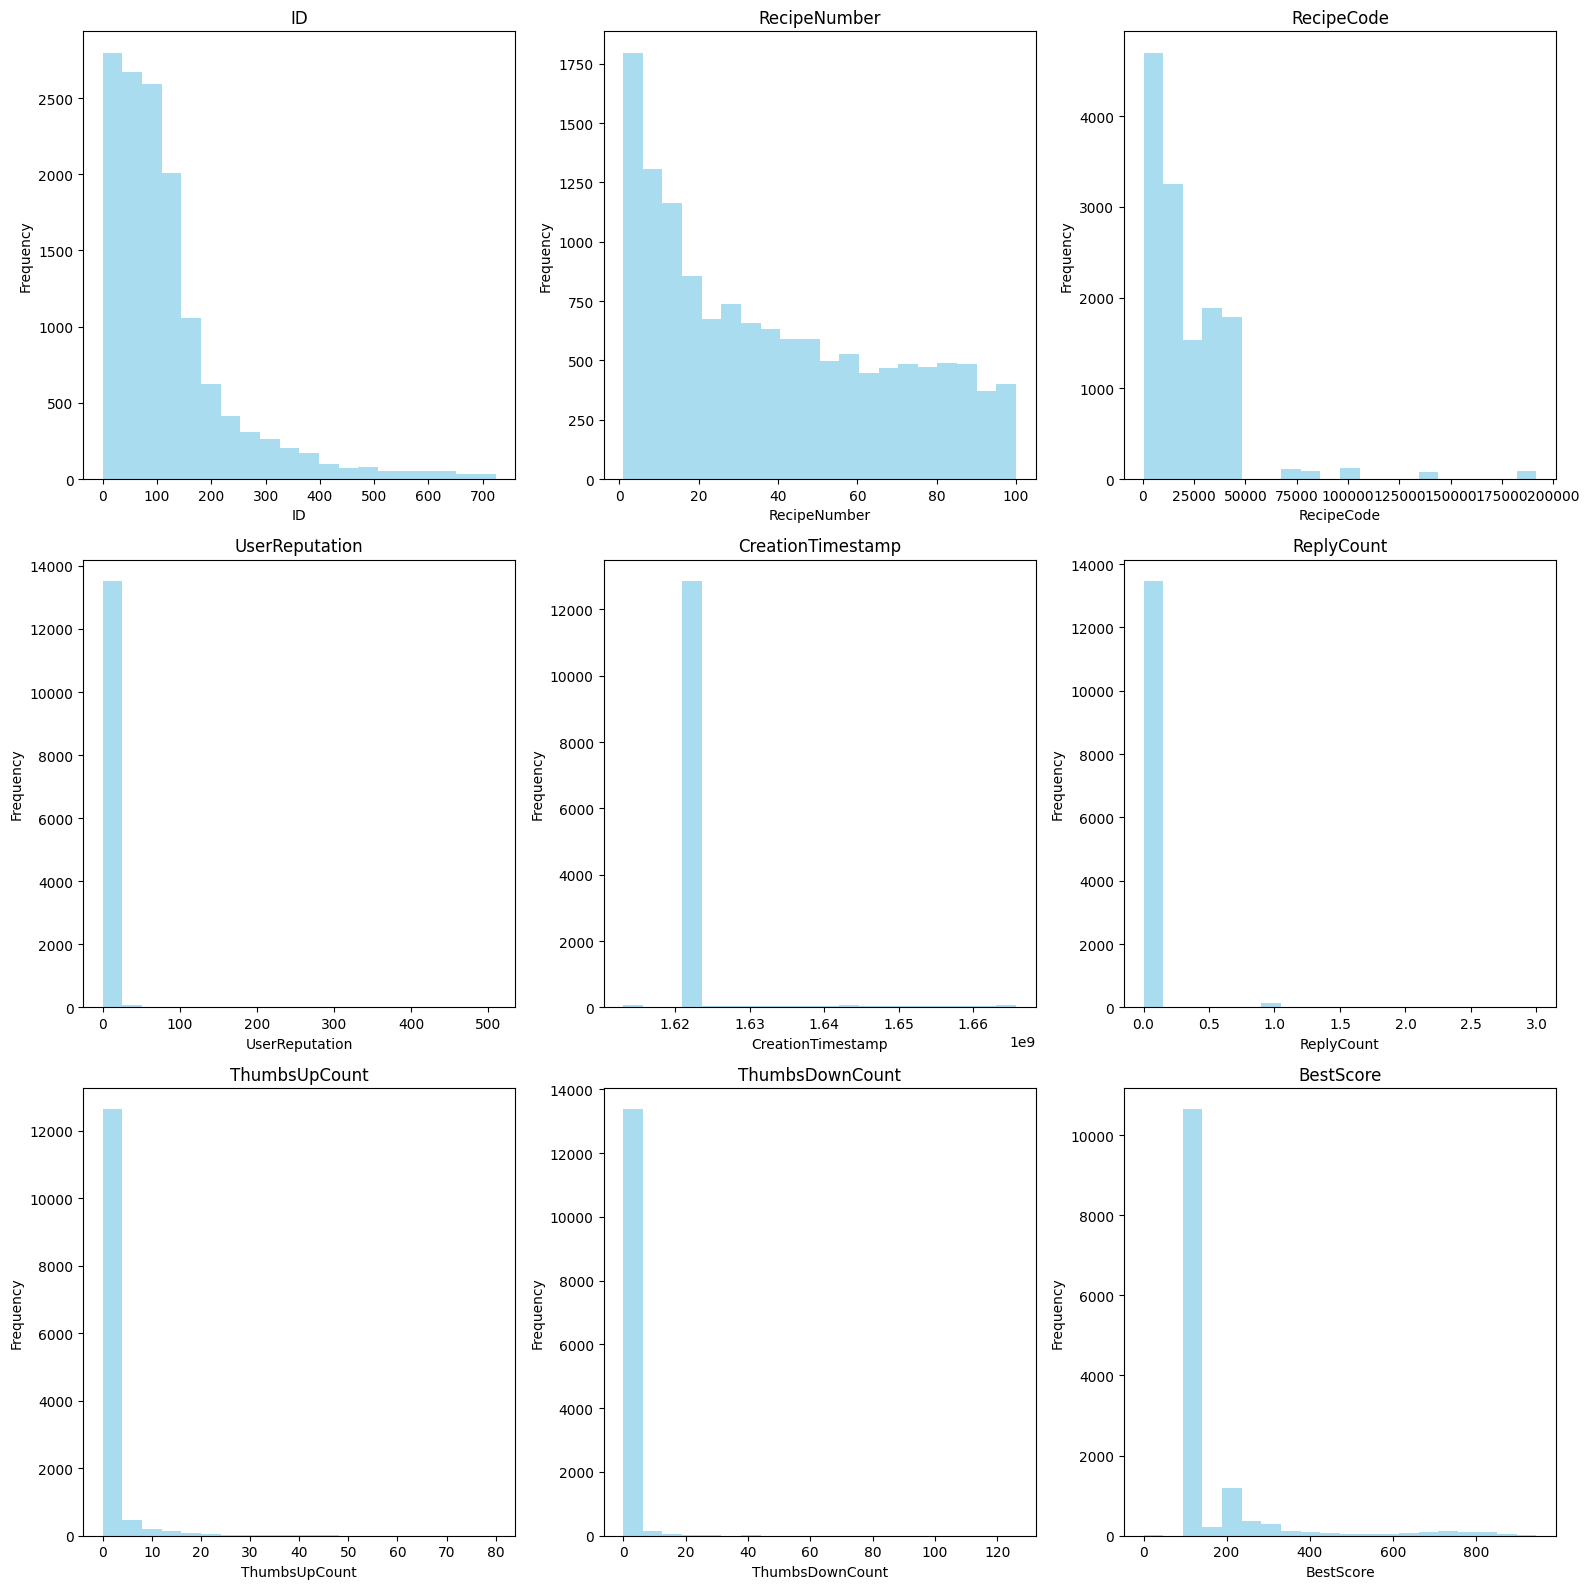

In [35]:
plot_data = train_dataset.drop(columns=['RecipeName', 'CommentID', 'UserID','UserName', 'Recipe_Review','Rating'])
# Create subplots for histograms
fig, axes = plt.subplots(3, 3, figsize=(16, 16))  # 3 rows and 3 columns for 9 features

# Loop through the columns and create histograms
for i, column in enumerate(plot_data.columns):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    ax.hist(plot_data[column], bins=20, color='skyblue', alpha=0.7)
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()

In [36]:
# Creating a preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [37]:
# Creating a CT preprocessor
CT = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)])

In [38]:
# Fit and transform the data and convert it into a dataframe
train_dataset_transformed = pd.DataFrame(CT.fit_transform(train_dataset))

In [39]:
train_dataset_transformed.head()

,0
0,"(0, 0)\t0.09668508287292818\n (0, 1)\t0.707..."
1,"(0, 0)\t0.09944751381215469\n (0, 1)\t0.878..."
2,"(0, 0)\t0.6325966850828729\n (0, 1)\t0.0202..."
3,"(0, 0)\t0.009668508287292817\n (0, 1)\t0.49..."
4,"(0, 0)\t0.08287292817679558\n (0, 1)\t0.111..."


In [40]:
# import re
# from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Define function to clean and preprocess text
# def preprocess_text(text):
#     # Convert text to lowercase
#     text = text.lower()
    
#     # Remove HTML tags
#     text = re.sub('<[^<]+?>', '', text)
    
#     # Remove non-alphanumeric characters and extra whitespaces
#     text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
#     # Remove stopwords
#     stop_words = set(ENGLISH_STOP_WORDS)
#     tokens = text.split()
#     tokens = [token for token in tokens if token not in stop_words]
#     text = ' '.join(tokens)
    
#     return text

# # Apply preprocessing to the Recipe_Review column
# train_dataset['Recipe_Review'] = train_dataset['Recipe_Review'].apply(preprocess_text)


In [41]:
X = train_dataset.drop(columns='Rating', axis=1)
y = train_dataset['Rating']
X.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [42]:
y

0        5
1        5
2        3
3        5
4        4
        ..
13631    5
13632    5
13633    5
13634    5
13635    5
Name: Rating, Length: 13636, dtype: int64

TF-IDF(Term Frequency-Inverse Document Frequency) Vectorizer and Count Vectorizer are popular techniques used in natural language processing (NLP) to convert text data into numerical representations suitable for machine learning algorithms.

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

Here, we initialize a CountVectorizer object named vec_username to convert the 'UserName' column into a matrix of token counts. It analyzes the text data to determine the unique words (tokens) present in the 'UserName' column and assigns an index to each unique word.

In [44]:
vec_username = CountVectorizer()
vec_username.fit(train_dataset['UserName'].values)

X_train_username = vec_username.transform(train_dataset['UserName'].values)
X_test_username = vec_username.transform(test_dataset['UserName'].values)

print(X_train_username.shape, y.shape)
print(X_test_username.shape)

(13636, 10855) (13636,)
(4546, 10855)


This code is similar to the previous one but applied to the 'RecipeName' column instead of the 'UserName' column. It analyzes the text data to determine the unique words (tokens) present in the 'RecipeName' column and assigns an index to each unique word.

In [45]:
vec = CountVectorizer()
vec.fit(train_dataset['RecipeName'].values)

X_train_recipe = vec.transform(train_dataset['RecipeName'].values)
X_test_recipe = vec.transform(test_dataset['RecipeName'].values)

print(X_train_recipe.shape, y.shape)
print(X_test_recipe.shape)

(13636, 185) (13636,)
(4546, 185)


Here we transform the 'Recipe_Review' column of the training dataset into a matrix of TF-IDF features ie. words that appear most frequently and are most important in the document. 

This code prepares the text data in the 'Recipe_Review' column for machine learning models by converting it into a numerical representation using TF-IDF features, which can then be used for training and testing classification models.

In [46]:
vec_rr = TfidfVectorizer(min_df=5,ngram_range=(1,4), max_features=10000 )
vec_rr.fit(train_dataset['Recipe_Review'].values)

X_train_rr = vec_rr.transform(train_dataset['Recipe_Review'].values)
X_test_rr = vec_rr.transform(test_dataset['Recipe_Review'].values)

print(X_train_rr.shape, y.shape)
print(X_test_rr.shape)

(13636, 10000) (13636,)
(4546, 10000)


In [47]:
# X_train_rr.columns

In [48]:
# from sklearn.feature_selection import SelectKBest, chi2

# # Create SelectKBest object
# selector = SelectKBest(score_func=chi2, k=800)

# # Fit selector to training data
# selector.fit(X_train_rr, y)

# # Transform training and testing data
# X_train_rr = selector.transform(X_train_rr)
# X_test_rr = selector.transform(X_test_rr)

# print(X_train_rr.shape, y.shape)
# print(X_test_rr.shape)

Horizontally stacking sparse matrices X_train_username, X_train_recipe, and X_train_rr into a single sparse matrix X_tr for the training data.

Similarly stacking X_test_username, X_test_recipe, and X_test_rr into X_te.

In [49]:
from scipy.sparse import hstack

X_tr = hstack((X_train_username, X_train_recipe, X_train_rr))
X_te = hstack((X_test_username, X_test_recipe, X_test_rr))

print(X_tr.shape, y.shape)
print(X_te.shape)

(13636, 21040) (13636,)
(4546, 21040)


In [50]:
X_tr, X_te

(<13636x21040 sparse matrix of type '<class 'numpy.float64'>'
 	with 766555 stored elements in Compressed Sparse Row format>,
 <4546x21040 sparse matrix of type '<class 'numpy.float64'>'
 	with 247984 stored elements in Compressed Sparse Row format>)

# **Dummy Classifier**
**Score: 0.76066**

In [51]:
# df = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')
# X = df.drop("Rating", axis = 1)
# y = df['Rating']

# from sklearn.dummy import DummyClassifier
# model = DummyClassifier(strategy = "most_frequent").fit(X,y)

# X_test = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')
# y_pred = model.predict(X_test)

# submission = pd.DataFrame({ 'ID': range(1,4547),
#                             'total_amount': y_pred})

# submission.to_csv('submission.csv', index = False) # converting it to csv file

# **Random Forrest Classifier**
**Score: 0.77298**

In [52]:
# from sklearn.ensemble import RandomForestClassifier
# r=RandomForestClassifier()
# r.fit(X_tr, y)

In [53]:
# y_pred = r.predict(X_tr)
# y_test_pred=r.predict(X_te)

# **CART: Decision Tree Classifier**
**Score: 0.76022**

In [54]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV

# # Create Decision Tree classifier
# cart = DecisionTreeClassifier()

# # Define hyperparameters and their values to tune
# param_grid = {
#     'criterion': ['gini', 'entropy'],    # Splitting criterion
#     'max_depth': [None, 10, 20, 30],     # Maximum depth of the tree
#     'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4],       # Minimum number of samples required to be at a leaf node
#     'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
# }

# # Perform grid search cross-validation
# grid_search = GridSearchCV(estimator=cart, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# # Fit the grid search to the training data
# grid_search.fit(X_tr, y)

# # Print the best hyperparameters found
# print("Best hyperparameters:", grid_search.best_params_)

# # Use the best model found by GridSearchCV
# best_cart = grid_search.best_estimator_

# # Make predictions on the training and testing sets using the best model
# y_pred_train = best_cart.predict(X_tr)
# y_pred_test = best_cart.predict(X_te)


# **Bagging**
**Score: 0.77562**

In [55]:
# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform, randint

# # Create base classifier (Decision Tree in this case)
# base_classifier = DecisionTreeClassifier()

# # Create Bagging Classifier
# bagging_classifier = BaggingClassifier(base_estimator=base_classifier)

# # Define hyperparameter distributions
# param_dist = {
#     'n_estimators': randint(10, 100),        # Randomly sample number of estimators
#     'max_samples': uniform(0.5, 0.5),        # Uniform distribution for max samples
#     'max_features': uniform(0.5, 0.5),       # Uniform distribution for max features
#     'bootstrap': [True, False]
# }

# # Perform randomized search cross-validation
# random_search_bagging = RandomizedSearchCV(estimator=bagging_classifier, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)

# # Fit the randomized search to the training data
# random_search_bagging.fit(X_tr, y)

# # Print the best hyperparameters found
# print("Best hyperparameters for Bagging:", random_search_bagging.best_params_)
# # Best hyperparameters for Bagging: {'bootstrap': True, 'max_features': 0.5102922471479012, 'max_samples': 0.9849549260809971, 'n_estimators': 39}

# # Use the best model found by RandomizedSearchCV
# best_bagging = random_search_bagging.best_estimator_

# # Make predictions on the training and testing sets using the best model
# y_pred_train = best_bagging.predict(X_tr)
# y_pred_test = best_bagging.predict(X_te)

# **Boosting**
**Score: 0.68741**

In [56]:
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV

# # Create base classifier (Decision Tree in this case)
# base_classifier = DecisionTreeClassifier()

# # Create AdaBoost Classifier
# adaboost_classifier = AdaBoostClassifier(base_classifier)

# # Define hyperparameters and their values to tune
# param_grid = {
#     'n_estimators': [50, 100, 200],  # Number of weak learners
#     'learning_rate': [0.1, 0.5, 1.0],  # Weight applied to each weak learner
#     'algorithm': ['SAMME', 'SAMME.R']  # Algorithm used for boosting
# }

# # Perform grid search cross-validation
# grid_search_adaboost = GridSearchCV(estimator=adaboost_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# # Fit the grid search to the training data
# grid_search_adaboost.fit(X_tr, y)

# # Print the best hyperparameters found
# print("Best hyperparameters for AdaBoost:", grid_search_adaboost.best_params_)
# # Best hyperparameters for AdaBoost: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 200}


# # Use the best model found by GridSearchCV for AdaBoost
# best_adaboost = grid_search_adaboost.best_estimator_

# # Make predictions on the training and testing sets using the best AdaBoost model
# y_pred_train = best_adaboost.predict(X_tr)
# y_pred_test = best_adaboost.predict(X_te)


# **2nd Highest Score: MLP Classifier with Random Search**
**Score: 0.78970**

MLP **(Multi-Layer Perceptron)** Classifier is extremely useful in datasets which have a combination of **numerical and categorical features**. In this project, the prediction of Rating is heavily dependent on the categorical feature - RecipeReview, which is based on the **user's sentiments**. Also, MLP classifier (being a **neural network**) is extremely competent in handling **non-linear relationships**. Here, there could be a non-linear relationship between UserReputatipn, ThumbsUpCount, ThumbsDownCount and RecipeReview which could non-linearly affect the Ratings.

In [57]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# # Create MLP classifier
# mlp = MLPClassifier()

# # Define hyperparameters and their values to tune
# param_dist = {
#     'hidden_layer_sizes': [(50,), (100,), (150,)],  # The number of neurons in each hidden layer.
#     'activation': ['relu', 'tanh'],  # The function applied to the output of each neuron in the hidden layers.
#     'solver': ['adam'],  # The optimization algorithm used to update the weights of the connections.
#     'alpha': [0.0001, 0.001],  # Regularization Parameter: alpha(L2 regularization) to prevent overfitting.
#     'learning_rate': ['constant']  # Determines the step size during weight updates.
# }
# # Neurons in hidden layers usually apply non-linear activation functions such as -
# # ReLU (Rectified Linear Unit), tanh (Hyperbolic Tangent), or sigmoid. They introduce non-linearity to the output
# # of individual neurons to learn complex relationships and patterns in the data.

# n_iter_search = 20

# # Perform randomized search cross-validation
# random_search_mlp = RandomizedSearchCV(estimator=mlp, param_distributions=param_dist, n_iter=n_iter_search, cv=5, scoring='accuracy', n_jobs=-1)

# # Fit the randomized search to the training data
# random_search_mlp.fit(X_tr, y)

# # Print the best hyperparameters found
# print("Best hyperparameters for MLP:", random_search_mlp.best_params_)
# # Best hyperparameters for MLP: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (150,), 'alpha': 0.001, 'activation': 'relu'}

# # Use the best model found by RandomizedSearchCV for MLP
# best_mlp = random_search_mlp.best_estimator_

# # Make predictions on the training and testing sets using the best MLP model
# y_pred_train = best_mlp.predict(X_tr)
# y_pred_test = best_mlp.predict(X_te)


# **1st Highest Score: MLP Classifier with Grid Search**
**Score: 0.79014**

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from scipy.stats import randint

# Define hyperparameters and their values to tune
param_grid = {
    'hidden_layer_sizes': [(150,)],  # The number of neurons in each hidden layer.
    'activation': ['relu'],  # The function applied to the output of each neuron in the hidden layers.
    'solver': ['adam'],  # The optimization algorithm used to update the weights of the connections.
    'alpha': [0.001],  # Regularization Parameter: alpha(L2 regularization) to prevent overfitting.
    'learning_rate': ['constant']  # Determines the step size during weight updates.
}

# Create MLP classifier
mlp = MLPClassifier()

# Perform grid search cross-validation
grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search_mlp.fit(X_tr, y)

# Print the best hyperparameters found
print("Best hyperparameters for MLP:", grid_search_mlp.best_params_)
# Best hyperparameters for MLP: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (150,), 'learning_rate': 'constant', 'solver': 'adam'}

# Use the best model found by GridSearchCV for MLP
best_mlp = grid_search_mlp.best_estimator_

# Make predictions on the training and testing sets using the best MLP model
y_pred_train = best_mlp.predict(X_tr)
y_pred_test = best_mlp.predict(X_te)

Best hyperparameters for MLP: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (150,), 'learning_rate': 'constant', 'solver': 'adam'}


# **KNN**
**Score: 0.76572**

In [59]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV

# # Create KNN classifier
# knn = KNeighborsClassifier()

# # Define hyperparameters and their values to tune
# param_grid = {
#     'n_neighbors': [3, 5, 7, 10],           # Number of neighbors
#     'weights': ['uniform', 'distance'],     # Weight function used in prediction
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
#     'p': [1, 2]                              # Power parameter for the Minkowski metric
# }

# # Perform grid search cross-validation
# grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# # Fit the grid search to the training data
# grid_search.fit(X_tr, y)

# # Print the best hyperparameters found
# print("Best hyperparameters:", grid_search.best_params_)

# # Use the best model found by GridSearchCV
# best_knn = grid_search.best_estimator_

# # Make predictions on the training and testing sets using the best model
# y_pred_train = best_knn.predict(X_tr)
# y_pred_test = best_knn.predict(X_te)


# **4th Highest Score: SVM**
**Score: 0.7853**

In [60]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# # Create SVC classifier
# svm = SVC()

# # Define hyperparameters and their values to tune
# param_grid = {
#     'C': [10],               # Regularization parameter 
# #                                             High value of C gives small margin and large classification error
# #                                             Small value of C gives large margin and small error.
#     'kernel': ['rbf'],  # It computes the dot product between the input features and is 
# #                                             suitable for linearly separable datasets.
#     'gamma': ['scale'],            # Kernel coefficient for 'rbf', 'poly', 'sigmoid'
#     'degree': [2]
# }
# # It computes the dot product between the input features and is suitable for linearly separable datasets.
# # The polynomial kernel: polynomial of the dot product of their feature vectors.It introduces nonlinearity
# #                    into the decision boundary, allowing SVMs to capture more complex relationships in the data.
# # The RBF kernel, also known as the Gaussian kernel, computes the similarity between samples based on the 
# #                      Gaussian (radial basis) function.
    
    
# # Perform grid search cross-validation
# grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# # Fit the grid search to the training data
# grid_search.fit(X_tr, y)

# # Print the best hyperparameters found
# print("Best hyperparameters:", grid_search.best_params_)
# Best hyperparameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

# # Use the best model found by GridSearchCV
# best_svm = grid_search.best_estimator_

# # Make predictions on the training and testing sets using the best model
# y_pred_train = best_svm.predict(X_tr)
# y_pred_test = best_svm.predict(X_te)


# **XGBClassifier**
**Score: 0.7809**

In [61]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split, GridSearchCV
# from xgboost import XGBClassifier

# # Fill missing values
# train_dataset = train_dataset.fillna('')

# # Split the dataset
# X = train_dataset["Recipe_Review"]
# y = train_dataset["Rating"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Vectorize the text data
# vectorizer = TfidfVectorizer()

# X_train_vectorized = vectorizer.fit_transform(X_train)
# X_test_vectorized = vectorizer.transform(X_test)

# # Define the parameter grid for hyperparameter tuning
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5]
# }

# # Initialize the XGBoost classifier
# xgb_model = XGBClassifier()

# # Perform grid search cross-validation
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# # Fit the grid search to the training data
# # grid_search.fit(X_train_vectorized, y_train)
# grid_search.fit(X_tr, y)

# # Print the best hyperparameters found
# print("Best hyperparameters:", grid_search.best_params_)

# # Use the best model found by GridSearchCV
# best_xgb_model = grid_search.best_estimator_

# # Make predictions on the training and testing sets using the best model
# # y_pred_train = best_xgb_model.predict(X_train_vectorized)
# # y_pred_test = best_xgb_model.predict(X_test_vectorized)
# y_pred_train = best_xgb_model.predict(X_tr)
# y_pred_test = best_xgb_model.predict(X_te)

# # xgb_model.fit(X_train, y_train)
# # y_pred = xgb_model.predict(X_test)

# **3rd Highest Score : Logistic Regression**
**Score: 0.78860**

In [62]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV

# LR = LogisticRegression(max_iter=1000)

# # Define hyperparameters and their values to tune
# param_grid = {
#     'penalty': ['l1', 'l2'],  # Regularization penalty
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
#     'solver': ['liblinear', 'saga']  # Optimization algorithm
# }

# # Perform grid search cross-validation
# grid_search = GridSearchCV(estimator=LR, param_grid=param_grid, cv=5, scoring='accuracy')

# # Fit the grid search to the training data
# grid_search.fit(X_tr, y)

# # Print the best hyperparameters found

# print("Best hyperparameters:", grid_search.best_params_)

# # Use the best model found by GridSearchCV
# best_LR = grid_search.best_estimator_

# # Make predictions on the training and testing sets using the best model
# y_pred_train = best_LR.predict(X_tr)
# y_pred_test = best_LR.predict(X_te)

# # LR.fit(X_tr, y)


# **LGBM Classifier**
**Score: 0.78332**

In [63]:
# from lightgbm import LGBMClassifier

# # Initialize the LightGBM classifier
# lgbm = LGBMClassifier()

# # Fit the classifier to the training data
# lgbm.fit(X_tr, y)

# # Make predictions on the training and testing sets
# y_pred_train = lgbm.predict(X_tr)
# y_pred_test = lgbm.predict(X_te)

In [64]:
# from lightgbm import LGBMClassifier
# from sklearn.model_selection import GridSearchCV

# lgbm = LGBMClassifier()

# # Define hyperparameters and their values to tune
# param_grid = {
#     'learning_rate': np.arange(0.01,0.2),
#     'n_estimators': range(50,250),
#     'max_depth': [3, 5, 10, 20, 30, 50],
#     'min_child_samples': [3, 5, 10, 20, 30, 50],
#     'subsample': [0.2, 0.4, 0.6, 0.8, 0.9],
#     'colsample_bytree': [0.2, 0.4, 0.6, 0.8, 0.9],
#     'reg_alpha': [0.0, 0.2, 0.5, 0.7, 1.0],
#     'reg_lambda': [0.0, 0.2, 0.5, 0.7, 1.0],
#     'n_jobs': [-1]
# }

# # param_grid = {
# #         'learning_rate': np.arange( 0.01, 0.2),
# #         'n_estimators': range(50, 250),
# #         'max_depth': range(3, 50),
# #         'min_child_samples': range(3, 50),
# #         'subsample': np.arange(0.2, 0.9),
# #         'colsample_bytree': np.arange(0.2, 0.9),
# #         'reg_alpha': np.arange(0.0, 1.0),
# #         'reg_lambda': np.arange(0.0, 1.0),
# #         'n_jobs': [-1]
# # }

# # Perform grid search cross-validation
# grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='accuracy')

# # Fit the grid search to the training data
# grid_search.fit(X_tr, y)

# # Print the best hyperparameters found

# print("Best hyperparameters:", grid_search.best_params_)

# # Use the best model found by GridSearchCV
# best_LGBM = grid_search.best_estimator_

# # Make predictions on the training and testing sets using the best model
# y_pred_train = best_LGBM.predict(X_tr)
# y_pred_test = best_LGBM.predict(X_te)

# # LR.fit(X_tr, y)

In [65]:
# Modified LGBM

# from lightgbm import LGBMClassifier
# from sklearn.model_selection import GridSearchCV

# lgbm = LGBMClassifier()

# # Define hyperparameters and their values to tune
# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],  # Narrowed down the range
#     'n_estimators': [50, 100, 150],       # Narrowed down the range
#     'max_depth': [3, 5, 10],              # Limited the values
#     'min_child_samples': [3, 5, 10],       # Limited the values
#     'subsample': [0.2, 0.6, 0.9],         # Limited the values
#     'colsample_bytree': [0.2, 0.6, 0.9],  # Limited the values
#     'reg_alpha': [0.0, 0.5, 1.0],          # Limited the values
#     'reg_lambda': [0.0, 0.5, 1.0],         # Limited the values
#     'n_jobs': [-1]
# }

# # Perform grid search cross-validation
# grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# # Fit the grid search to the training data
# grid_search.fit(X_tr, y)

# # Print the best hyperparameters found
# print("Best hyperparameters:", grid_search.best_params_)

# # Use the best model found by GridSearchCV
# best_LGBM = grid_search.best_estimator_

# # Make predictions on the training and testing sets using the best model
# y_pred_train = best_LGBM.predict(X_tr)
# y_pred_test = best_LGBM.predict(X_te)


In [66]:
# #Alternate Code:
# #Score: 0.78332

# from lightgbm import LGBMClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint, uniform

# lgbm = LGBMClassifier()

# # Define hyperparameters and their values to tune
# param_dist = {
#     'learning_rate': uniform(0.01, 0.19),  # Uniform distribution between 0.01 and 0.2
#     'n_estimators': randint(50, 250),       # Discrete uniform distribution between 50 and 250
#     'max_depth': randint(3, 51),            # Discrete uniform distribution between 3 and 50
#     'min_child_samples': randint(3, 51),     # Discrete uniform distribution between 3 and 50
#     'subsample': uniform(0.2, 0.7),         # Uniform distribution between 0.2 and 0.9
#     'colsample_bytree': uniform(0.2, 0.7),  # Uniform distribution between 0.2 and 0.9
#     'reg_alpha': uniform(0.0, 1.0),          # Uniform distribution between 0.0 and 1.0
#     'reg_lambda': uniform(0.0, 1.0),         # Uniform distribution between 0.0 and 1.0
#     'n_jobs': [-1]
# }

# # Perform randomized search cross-validation
# random_search = RandomizedSearchCV(estimator=lgbm, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# # Fit the randomized search to the training data
# random_search.fit(X_tr, y)

# # Print the best hyperparameters found
# print("Best hyperparameters:", random_search.best_params_)

# # Use the best model found by RandomizedSearchCV
# best_LGBM = random_search.best_estimator_

# # Make predictions on the training and testing sets using the best model
# y_pred_train = best_LGBM.predict(X_tr)
# y_pred_test = best_LGBM.predict(X_te)


# **Stacking Classifier**

In [67]:
# from sklearn.ensemble import StackingClassifier
# from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
# from sklearn.neural_network import MLPClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from scipy.stats import randint

# # Define base classifiers
# mlp = MLPClassifier()
# lr = LogisticRegression(max_iter=1000)
# svm = SVC()

# # Define hyperparameters and their values to tune for each base classifier
# param_dist_mlp = {
#     'hidden_layer_sizes': [(150,)],
#     'activation': ['relu'],
#     'solver': ['adam'],
#     'alpha': [0.001],
#     'learning_rate': ['constant']
# }

# param_dist_lr = {
#     'penalty': ['l1', 'l2'],
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'solver': ['liblinear', 'saga']
# }

# param_dist_svm = {
#     'C': [10],
#     'degree': [2],
#     'kernel': ['rbf'],
#     'gamma': ['scale']
# }

# # Define the Stacking Classifier
# estimators = [
#     ('mlp', MLPClassifier()),
#     ('lr', LogisticRegression(max_iter=1000)),
#     ('svm', SVC())
# ]
# stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=MLPClassifier())

# # Define hyperparameters and their values to tune for the stacking classifier
# param_dist_stacking = {
#     'final_estimator__hidden_layer_sizes': [(100,)],
#     'final_estimator__activation': ['relu'],
#     'final_estimator__solver': ['adam'],
#     'final_estimator__alpha': [0.0001],
#     'final_estimator__learning_rate': ['constant']
# }

# # Define StratifiedKFold for cross-validation
# cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# # Perform Randomized Search CV for Stacking Classifier
# random_search_stacking = RandomizedSearchCV(estimator=stacking_classifier, param_distributions=param_dist_stacking, n_iter=10, cv=cv, scoring='accuracy', n_jobs=-1)

# # Fit the randomized search to the training data
# random_search_stacking.fit(X_tr, y)

# # Print the best hyperparameters found
# print("Best hyperparameters for Stacking Classifier:", random_search_stacking.best_params_)
# # Best hyperparameters for Stacking Classifier: {'final_estimator__solver': 'adam', 'final_estimator__learning_rate': 'constant', 'final_estimator__hidden_layer_sizes': (100,), 'final_estimator__alpha': 0.0001, 'final_estimator__activation': 'relu'}

# # Use the best model found by RandomizedSearchCV for Stacking Classifier
# best_stacking = random_search_stacking.best_estimator_

# # Make predictions on the training and testing sets using the best Stacking Classifier model
# y_pred_train_stacking = best_stacking.predict(X_tr)
# y_pred_test_stacking = best_stacking.predict(X_te)


# **Submission Code**

In [68]:
ID=[]
for i in range (1,len(y_pred_test)+1):
    ID.append(i)
final_pred = pd.DataFrame({"ID":ID,"total_amount":y_pred_test})
final_pred.to_csv("submission.csv",index=False)